In [0]:
import pandas as pd
import numpy as np  
pd.set_option('display.max_rows', None)

In [0]:
imdb_url = 'https://raw.githubusercontent.com/SanchayniB/Serendipitous-Recommender-System/master/Intermediate_data/IMDb_cldata.csv'
IMDb_cldata = pd.read_csv(imdb_url, index_col= 0)

In [0]:
user_url = 'https://raw.githubusercontent.com/SanchayniB/Serendipitous-Recommender-System/master/Intermediate_data/user_clusters.csv'
user_clusters = pd.read_csv(user_url, index_col = 0)

In [78]:
train_url = 'https://raw.githubusercontent.com/SanchayniB/Serendipitous-Recommender-System/master/Intermediate_data/train_subset.csv'
train_subset  = pd.read_csv(train_url, index_col= 0)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [0]:
movies_url = 'https://raw.githubusercontent.com/SanchayniB/Serendipitous-Recommender-System/master/Intermediate_data/filtered_movies_genre.csv'
movies_filtered = pd.read_csv(movies_url,index_col= 0)

In [80]:
user_clusters.head()

,cluster,userId
0,3,100032
1,3,100036
2,3,100053
3,2,100057
4,3,100058


In [81]:
user_clusters.shape

(19203, 2)

In [82]:
IMDb_cldata.head()

,country codes,genres,language codes,plot,rating,runtimes,votes,imdbId,country codes_us,country codes_gb,country codes_fr,country codes_it,country codes_ca,country codes_de,country codes_jp,country codes_es,country codes_in,country codes_hk,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Crime,genres_Horror,genres_Adventure,genres_Documentary,genres_Mystery,language codes_en,language codes_fr,language codes_es,language codes_it,language codes_de,language codes_ja,language codes_ru,language codes_cmn,language codes_hi,language codes_sv,certificates_G,certificates_NR,certificates_PG,certificates_R,kind_movie,kind_series,year_1800s,year_1900s,year_1950s,year_2000s
0,['us'],"['Animation', 'Adventure', 'Comedy', 'Family',...",['en'],"[u""A cowboy doll is profoundly threatened and ...",8.3,81,837115.0,114709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,['us'],"['Adventure', 'Comedy', 'Family', 'Fantasy']","['en', 'fr']",[u'When two kids find and play a magical board...,7.0,104,287007.0,113497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,['us'],"['Comedy', 'Romance']","['en', 'it', 'de']","[u""John and Max resolve to save their beloved ...",6.7,101,23107.0,113228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,['us'],"['Comedy', 'Drama', 'Romance']",['en'],"[u""Based on Terry McMillan's novel, this film ...",5.9,124,9034.0,114885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,['us'],"['Comedy', 'Family', 'Romance']",['en'],[u'George Banks must deal not only with the pr...,6.0,106,32568.0,113041,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
IMDb_cldata.columns

Index(['country codes', 'genres', 'language codes', 'plot', 'rating',
       'runtimes', 'votes', 'imdbId', 'country codes_us', 'country codes_gb',
       'country codes_fr', 'country codes_it', 'country codes_ca',
       'country codes_de', 'country codes_jp', 'country codes_es',
       'country codes_in', 'country codes_hk', 'genres_Drama', 'genres_Comedy',
       'genres_Thriller', 'genres_Romance', 'genres_Action', 'genres_Crime',
       'genres_Horror', 'genres_Adventure', 'genres_Documentary',
       'genres_Mystery', 'language codes_en', 'language codes_fr',
       'language codes_es', 'language codes_it', 'language codes_de',
       'language codes_ja', 'language codes_ru', 'language codes_cmn',
       'language codes_hi', 'language codes_sv', 'certificates_G',
       'certificates_NR', 'certificates_PG', 'certificates_R', 'kind_movie',
       'kind_series', 'year_1800s', 'year_1900s', 'year_1950s', 'year_2000s'],
      dtype='object')

In [84]:
train_subset.head()

,userId,movieId,rating,timestamp,year
25352,127137,115824,4.5,2017-12-31 23:59:50,2017
25353,142748,2762,5.0,2017-12-31 23:59:41,2017
25354,196198,1198,3.5,2017-12-31 23:59:17,2017
25355,142748,71057,4.5,2017-12-31 23:58:09,2017
25356,142748,152077,5.0,2017-12-31 23:57:32,2017


In [0]:
train_subset_tagged = train_subset.merge(user_clusters, how = 'inner', on = 'userId')

In [86]:
train_subset_tagged.head()

,userId,movieId,rating,timestamp,year,cluster
0,127137,115824,4.5,2017-12-31 23:59:50,2017,1
1,127137,1267,4.5,2017-12-31 06:38:16,2017,1
2,127137,81257,4.5,2017-12-30 07:28:47,2017,1
3,127137,175981,3.0,2017-12-29 10:06:27,2017,1
4,127137,96728,3.0,2017-12-29 07:32:48,2017,1


In [87]:
len(train_subset_tagged['userId'].unique()), len(train_subset_tagged['movieId'].unique())

(19203, 36529)

In [88]:
len(movies_filtered['movieId'].unique())

22351

In [89]:
len(set(movies_filtered['movieId']).intersection(set(train_subset['movieId'].unique())))

17035

In [90]:
movies_filtered.columns

Index(['movieId', 'title', 'releaseDate', 'directedBy', 'starring', 'imdbId',
       'tmdbId', 'genres', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'nan'],
      dtype='object')

In [91]:
len(movies_filtered['imdbId'].unique()), len(IMDb_cldata['imdbId'].unique())

(22286, 43697)

In [0]:
movies_IMdb = movies_filtered.merge(IMDb_cldata, how = 'inner', on = 'imdbId')

In [93]:
len(movies_IMdb['movieId'].unique()), len(train_subset_tagged['movieId'].unique())

(20381, 36529)

In [0]:
train_subset_tagged = train_subset_tagged.merge(movies_IMdb['movieId'], how = 'inner' , on = 'movieId') 

In [95]:
len(train_subset_tagged['movieId'].unique())

15836

In [96]:
movies_IMdb.columns

Index(['movieId', 'title', 'releaseDate', 'directedBy', 'starring', 'imdbId',
       'tmdbId', 'genres_x', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'nan', 'country codes', 'genres_y', 'language codes',
       'plot', 'rating', 'runtimes', 'votes', 'country codes_us',
       'country codes_gb', 'country codes_fr', 'country codes_it',
       'country codes_ca', 'country codes_de', 'country codes_jp',
       'country codes_es', 'country codes_in', 'country codes_hk',
       'genres_Drama', 'genres_Comedy', 'genres_Thriller', 'genres_Romance',
       'genres_Action', 'genres_Crime', 'genres_Horror', 'genres_Adventure',
       'genres_Documentary', 'genres_Mystery', 'language codes_en',
       'language codes_fr', 'language codes_es', 'language codes_it',
       'language codes_de', 'language codes_ja', 'lan

In [97]:
movies_IMdb.isna().sum()

movieId                  0
title                    0
releaseDate              0
directedBy             415
starring               822
imdbId                   0
tmdbId                 354
genres_x                 0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
IMAX                     0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
nan                      0
country codes            0
genres_y                 0
language codes           0
plot                     0
rating                   0
runtimes                 0
votes                    0
country codes_us      1624
country codes_gb      1624
c

In [98]:
movies_IMdb.columns

Index(['movieId', 'title', 'releaseDate', 'directedBy', 'starring', 'imdbId',
       'tmdbId', 'genres_x', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'nan', 'country codes', 'genres_y', 'language codes',
       'plot', 'rating', 'runtimes', 'votes', 'country codes_us',
       'country codes_gb', 'country codes_fr', 'country codes_it',
       'country codes_ca', 'country codes_de', 'country codes_jp',
       'country codes_es', 'country codes_in', 'country codes_hk',
       'genres_Drama', 'genres_Comedy', 'genres_Thriller', 'genres_Romance',
       'genres_Action', 'genres_Crime', 'genres_Horror', 'genres_Adventure',
       'genres_Documentary', 'genres_Mystery', 'language codes_en',
       'language codes_fr', 'language codes_es', 'language codes_it',
       'language codes_de', 'language codes_ja', 'lan

In [0]:
movies_columns = ['movieId', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'runtimes', 'votes', 'country codes_us',
       'country codes_gb', 'country codes_fr', 'country codes_it',
       'country codes_ca', 'country codes_de', 'country codes_jp',
       'country codes_es', 'country codes_in', 'country codes_hk',
       'genres_Drama', 'genres_Comedy', 'genres_Thriller', 'genres_Romance',
       'genres_Action', 'genres_Crime', 'genres_Horror', 'genres_Adventure',
       'genres_Documentary', 'genres_Mystery', 'language codes_en',
       'language codes_fr', 'language codes_es', 'language codes_it',
       'language codes_de', 'language codes_ja', 'language codes_ru',
       'language codes_cmn', 'language codes_hi', 'language codes_sv',
       'certificates_G', 'certificates_NR', 'certificates_PG',
       'certificates_R', 'kind_movie', 'kind_series', 'year_1800s',
       'year_1900s', 'year_1950s', 'year_2000s']

In [0]:
movie_ac_clusters = {}
for cluster in train_subset_tagged['cluster'].unique():
    cl_data = train_subset_tagged[train_subset_tagged['cluster'] == cluster]
    cl_dict = {}
    cl_dict['data'] = movies_IMdb.merge(cl_data['movieId'],how = 'right', on = 'movieId')[movies_columns]
    cl_dict['data'] = cl_dict['data'].drop_duplicates('movieId').reset_index(drop = True)
    cl_dict['movieIds'] = list(cl_data['movieId'].unique())
    movie_ac_clusters[cluster] = cl_dict

In [102]:
len(movie_ac_clusters[0]['movieIds']), len(movie_ac_clusters[1]['movieIds']), len(movie_ac_clusters[2]['movieIds']),len(movie_ac_clusters[3]['movieIds'])

(10409, 12695, 8285, 8575)

In [103]:
movie_ac_clusters[0]['data'].head()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,runtimes,votes,country codes_us,country codes_gb,country codes_fr,country codes_it,country codes_ca,country codes_de,country codes_jp,country codes_es,country codes_in,country codes_hk,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Crime,genres_Horror,genres_Adventure,genres_Documentary,genres_Mystery,language codes_en,language codes_fr,language codes_es,language codes_it,language codes_de,language codes_ja,language codes_ru,language codes_cmn,language codes_hi,language codes_sv,certificates_G,certificates_NR,certificates_PG,certificates_R,kind_movie,kind_series,year_1800s,year_1900s,year_1950s,year_2000s
0,106491,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,128,140571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,85414,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,93,465374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,130,37593.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,58627,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,92750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5313,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,92,126013.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [0]:
movies_columns.append('cluster')
movies_IMdb_fl = movies_IMdb.merge(train_subset_tagged[['movieId','cluster']],how = 'right', on = 'movieId')[movies_columns]

In [0]:
movies_IMdb_fl = movies_IMdb_fl.drop_duplicates('movieId').reset_index(drop = True)

In [106]:
movies_IMdb_fl.columns

Index(['movieId', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'runtimes', 'votes', 'country codes_us', 'country codes_gb',
       'country codes_fr', 'country codes_it', 'country codes_ca',
       'country codes_de', 'country codes_jp', 'country codes_es',
       'country codes_in', 'country codes_hk', 'genres_Drama', 'genres_Comedy',
       'genres_Thriller', 'genres_Romance', 'genres_Action', 'genres_Crime',
       'genres_Horror', 'genres_Adventure', 'genres_Documentary',
       'genres_Mystery', 'language codes_en', 'language codes_fr',
       'language codes_es', 'language codes_it', 'language codes_de',
       'language codes_ja', 'language codes_ru', 'language codes_cmn',
       'language codes_hi', 'language codes_sv', 'certificates_G',
       'certificates_NR', 'certificates_PG', 'certificates_R',

In [107]:
movies_columns.pop(0)
movies_columns.pop()

'cluster'

In [108]:
for i,cluster in enumerate(movies_IMdb_fl['cluster'].unique()):
    col_name = 'cluster_' + str(i)
    print(cluster)
    movies_IMdb_fl[col_name] = movies_IMdb_fl['cluster'].apply(
        lambda x : 1 if x == cluster else 0)

1
3
0
2


----
## XGBoost

### Cluster 0

In [0]:
movies_IMdb_fl[movies_columns] = movies_IMdb_fl[movies_columns].fillna(0)

In [0]:
import xgboost

In [111]:
XGBoostmodel00 = xgboost.train({"learning_rate": 0.01,'objective': 'binary:logistic'},
                             xgboost.DMatrix(movies_IMdb_fl[movies_columns], label=movies_IMdb_fl['cluster_0']), 100)


Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [112]:
!pip install shap
import shap
explainer00 = shap.TreeExplainer(XGBoostmodel00)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
shap_values00 = explainer00.shap_values(movies_IMdb_fl[movies_columns])

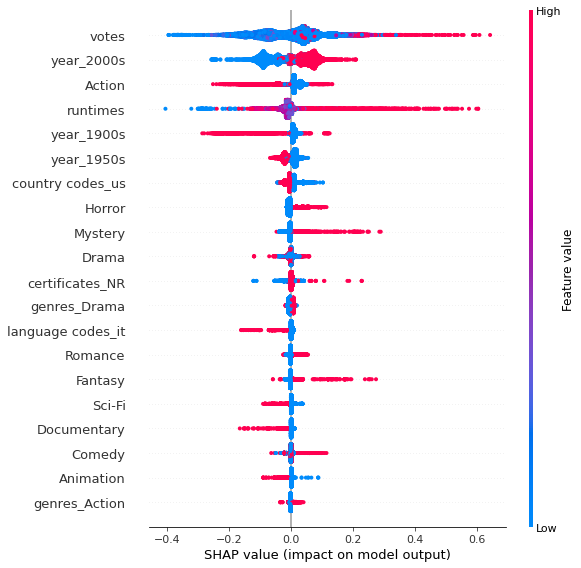

In [114]:
shap.summary_plot(shap_values00, movies_IMdb_fl[movies_columns])

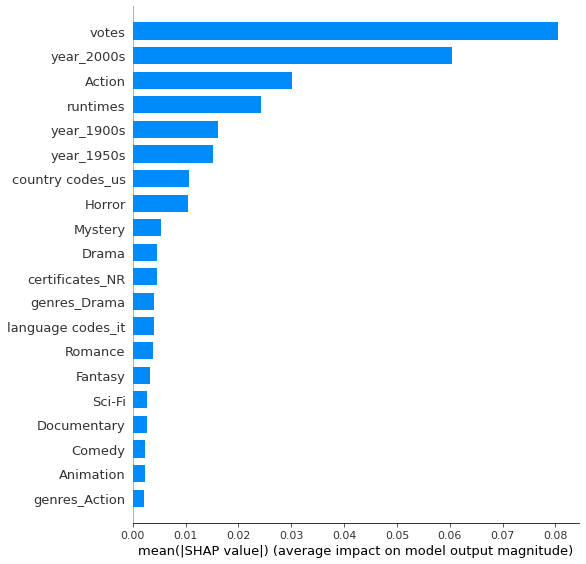

In [115]:
shap.summary_plot(shap_values00, movies_IMdb_fl[movies_columns], plot_type = 'bar')

In [116]:
XGBoostmodel01 = xgboost.train({"learning_rate": 0.01,'objective': 'binary:logistic'},
                             xgboost.DMatrix(movies_IMdb_fl[movies_columns], label=movies_IMdb_fl['cluster_1']), 100)


Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [117]:
explainer01 = shap.TreeExplainer(XGBoostmodel01)
shap_values01 = explainer01.shap_values(movies_IMdb_fl[movies_columns])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


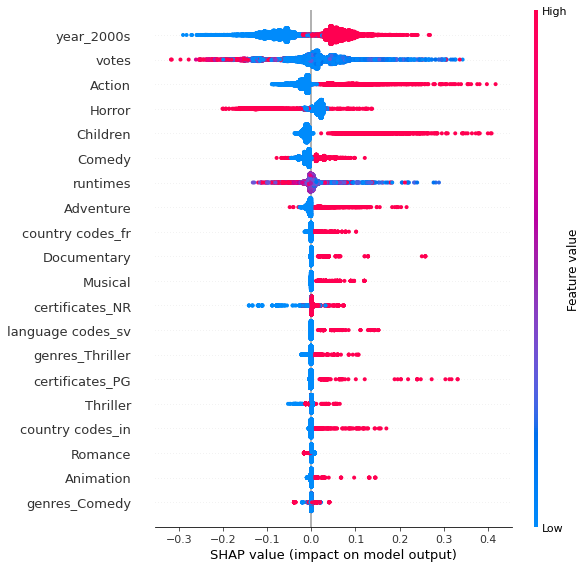

In [118]:
shap.summary_plot(shap_values01, movies_IMdb_fl[movies_columns])

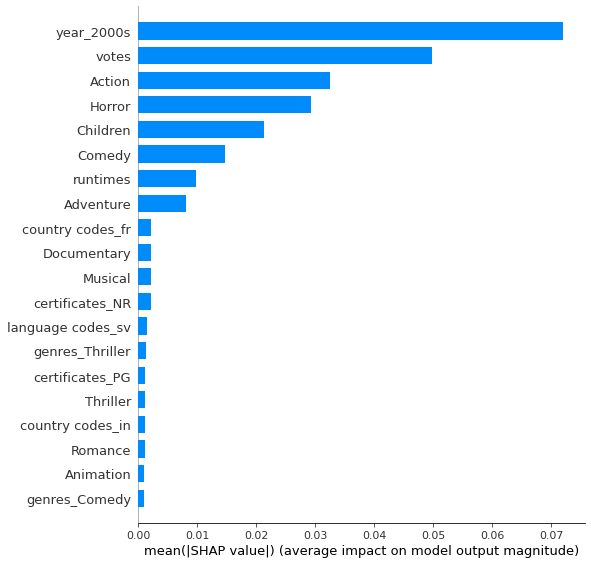

In [119]:
shap.summary_plot(shap_values01, movies_IMdb_fl[movies_columns], plot_type = 'bar')

In [120]:
XGBoostmodel02 = xgboost.train({"learning_rate": 0.01,'objective': 'binary:logistic'},
                             xgboost.DMatrix(movies_IMdb_fl[movies_columns], label=movies_IMdb_fl['cluster_2']), 100)


Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [121]:
explainer02 = shap.TreeExplainer(XGBoostmodel02)
shap_values02 = explainer02.shap_values(movies_IMdb_fl[movies_columns])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


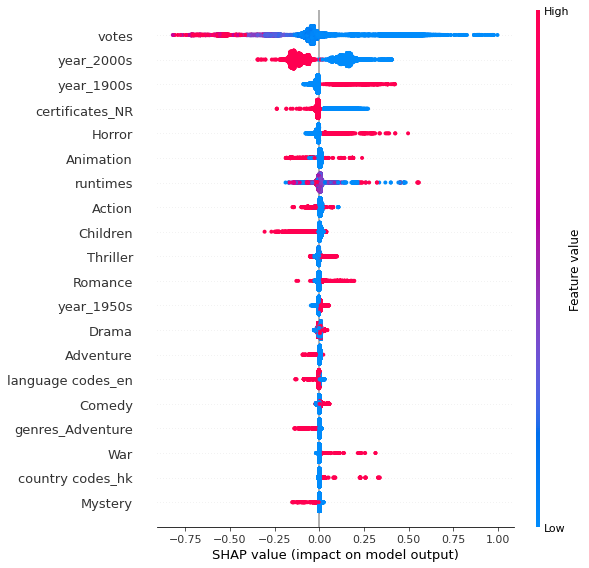

In [122]:
shap.summary_plot(shap_values02, movies_IMdb_fl[movies_columns])

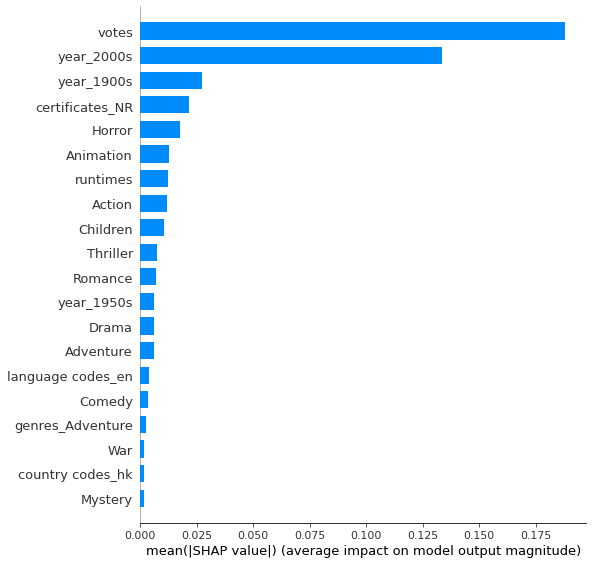

In [128]:
shap.summary_plot(shap_values02, movies_IMdb_fl[movies_columns], plot_type = 'bar')

In [123]:
XGBoostmodel03 = xgboost.train({"learning_rate": 0.01,'objective': 'binary:logistic'},
                             xgboost.DMatrix(movies_IMdb_fl[movies_columns], label=movies_IMdb_fl['cluster_3']), 100)


Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [124]:
explainer03 = shap.TreeExplainer(XGBoostmodel03)
shap_values03 = explainer03.shap_values(movies_IMdb_fl[movies_columns])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


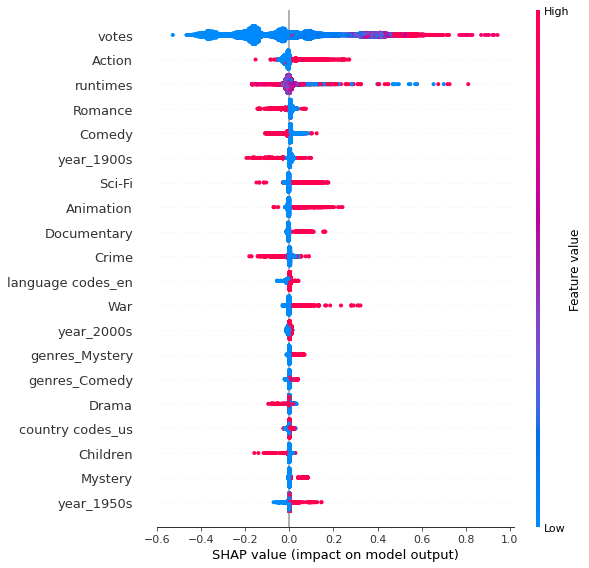

In [125]:
shap.summary_plot(shap_values03, movies_IMdb_fl[movies_columns])

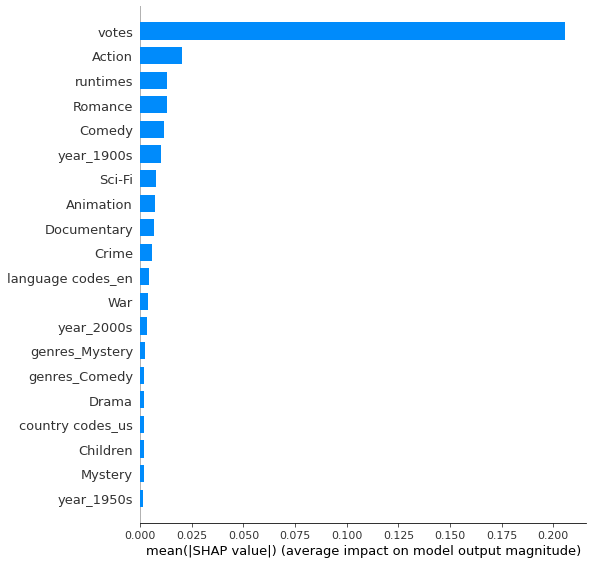

In [126]:
shap.summary_plot(shap_values03, movies_IMdb_fl[movies_columns],plot_type='bar')

In [0]:
import matplotlib.pyplot as plt

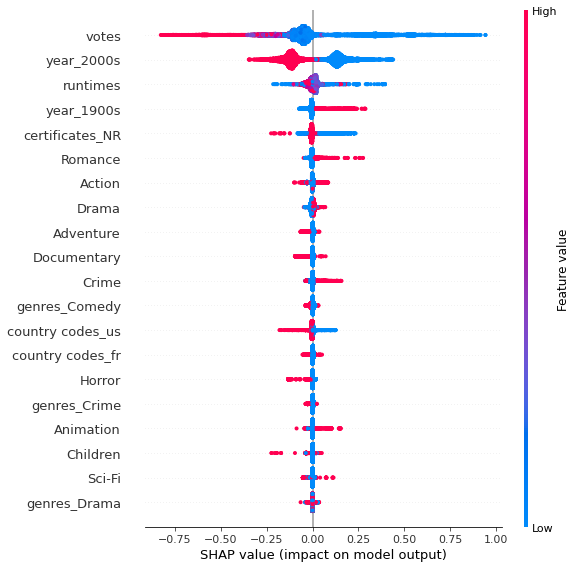

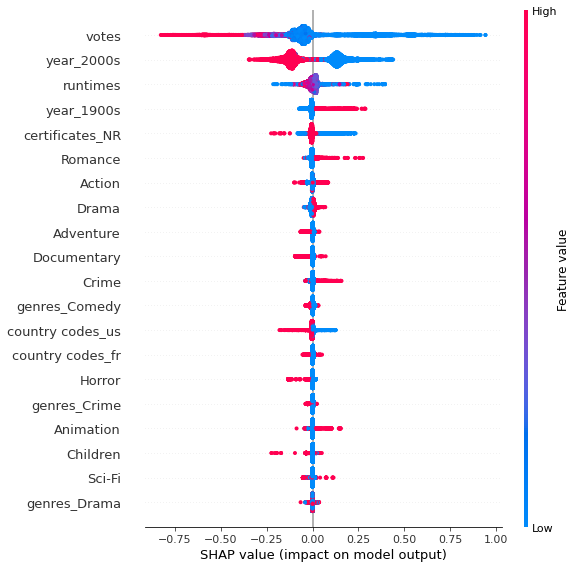

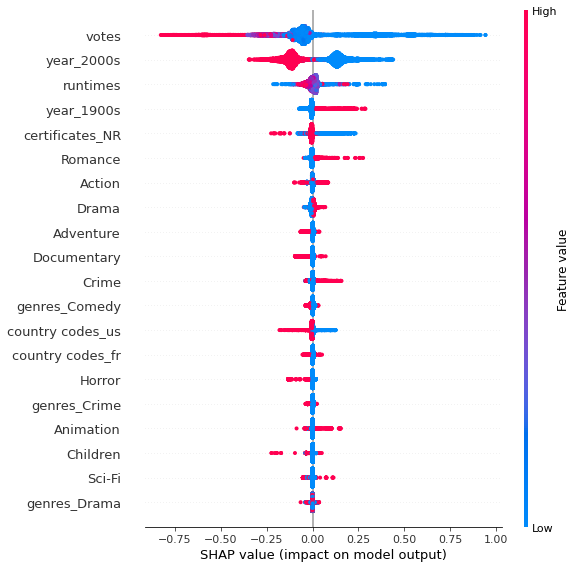

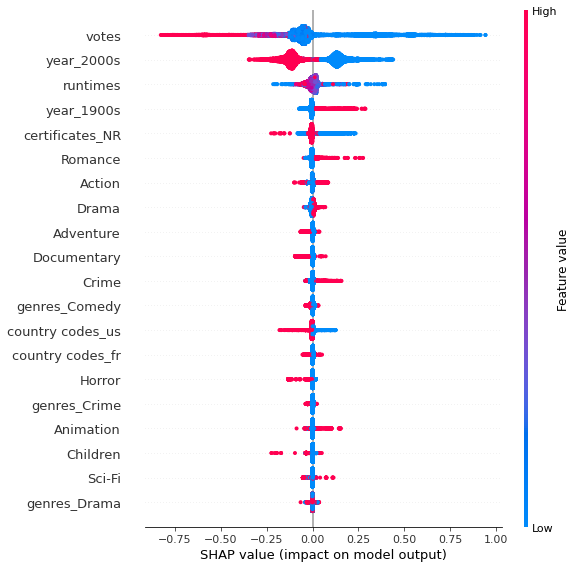

In [67]:

p0 = shap.summary_plot(shap_values00, movies_IMdb_fl[movies_columns])
p1 = shap.summary_plot(shap_values01, movies_IMdb_fl[movies_columns])
p2 = shap.summary_plot(shap_values02, movies_IMdb_fl[movies_columns])
p3 = shap.summary_plot(shap_values03, movies_IMdb_fl[movies_columns])
